# Before you begin


1.   Use the [Cloud Resource Manager](https://console.cloud.google.com/cloud-resource-manager) to Create a Cloud Platform project if you do not already have one.
2.   [Enable billing](https://support.google.com/cloud/answer/6293499#enable-billing) for the project.
3.   [Enable BigQuery](https://console.cloud.google.com/flows/enableapi?apiid=bigquery) APIs for the project.


### Provide your Google Cloud credentials to the runtime

In [1]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


## Optional: Enable data table display

Colab includes the ``google.colab.data_table`` package that can be used to display large pandas dataframes as an interactive data table.
It can be enabled with:

In [2]:
%load_ext google.colab.data_table

If you would prefer to return to the classic Pandas dataframe display, you can disable this by running:
```python
%unload_ext google.colab.data_table
```

Declare the Cloud project ID which will be used throughout this notebook

In [3]:
project_id = 'cmpelkk'

In [4]:
!gcloud config list

[component_manager]
disable_update_check = True
[compute]
gce_metadata_read_timeout_sec = 0
[core]
account = kaikai.liu@sjsu.edu

Your active configuration is: [default]


In [5]:
#!gcloud config set compute/region us-central1
#!gcloud config set compute/zone us-central1-a
!gcloud config list project

[core]
project (unset)

Your active configuration is: [default]


In [6]:
!gcloud config set project 'cmpelkk'

Updated property [core/project].


In [7]:
!gcloud config list project

[core]
project = cmpelkk

Your active configuration is: [default]


# BigQuery COVID-19 NYT Example

In [8]:
from google.cloud import bigquery

# https://cloud.google.com/resource-manager/docs/creating-managing-projects
project_id = 'cmpelkk'
client = bigquery.Client(project=project_id)

#Print your current data
for dataset in client.list_datasets():
  print(dataset.dataset_id)

MLtest1
census
covid_demo
dataproctest
heartRateData
iottest
weatherData


In [9]:
sql = """
SELECT
    *
FROM
    `bigquery-public-data.covid19_nyt.us_states`
ORDER BY
    date
"""
dfquery = client.query(sql)

In [10]:
df_covid=dfquery.to_dataframe()
df_covid.head(200)

,date,state_name,state_fips_code,confirmed_cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
195,2020-02-25,Arizona,04,1,0
196,2020-02-25,Illinois,17,2,0
197,2020-02-25,Nebraska,31,13,0
198,2020-02-25,Wisconsin,55,1,0


In [11]:
df_covid.tail(200)

,date,state_name,state_fips_code,confirmed_cases,deaths
29569,2021-08-22,Arkansas,05,435256,6674
29570,2021-08-22,Colorado,08,603220,7234
29571,2021-08-22,Delaware,10,116771,1854
29572,2021-08-22,Illinois,17,1486875,26223
29573,2021-08-22,Kentucky,21,536517,7572
...,...,...,...,...,...
29764,2021-08-25,North Carolina,37,1173815,14224
29765,2021-08-25,South Carolina,45,702894,10357
29766,2021-08-25,Virgin Islands,78,5684,51
29767,2021-08-25,District of Columbia,11,54156,1155


In [12]:
is_California = df_covid['state_name']=='California'

In [13]:
df_ca=df_covid[is_California]
df_ca.head()

,date,state_name,state_fips_code,confirmed_cases,deaths
6,2020-01-25,California,06,1,0
10,2020-01-26,California,06,2,0
14,2020-01-27,California,06,2,0
18,2020-01-28,California,06,2,0
22,2020-01-29,California,06,2,0


In [14]:
df_ca.tail(30)

,date,state_name,state_fips_code,confirmed_cases,deaths
28155,2021-07-27,California,06,4004981,64296
28210,2021-07-28,California,06,4012673,64325
28265,2021-07-29,California,06,4022880,64372
28320,2021-07-30,California,06,4034150,64415
28375,2021-07-31,California,06,4037490,64417
28430,2021-08-01,California,06,4040811,64417
28485,2021-08-02,California,06,4066259,64538
28540,2021-08-03,California,06,4073891,64533
28595,2021-08-04,California,06,4084002,64626
28650,2021-08-05,California,06,4096518,64680


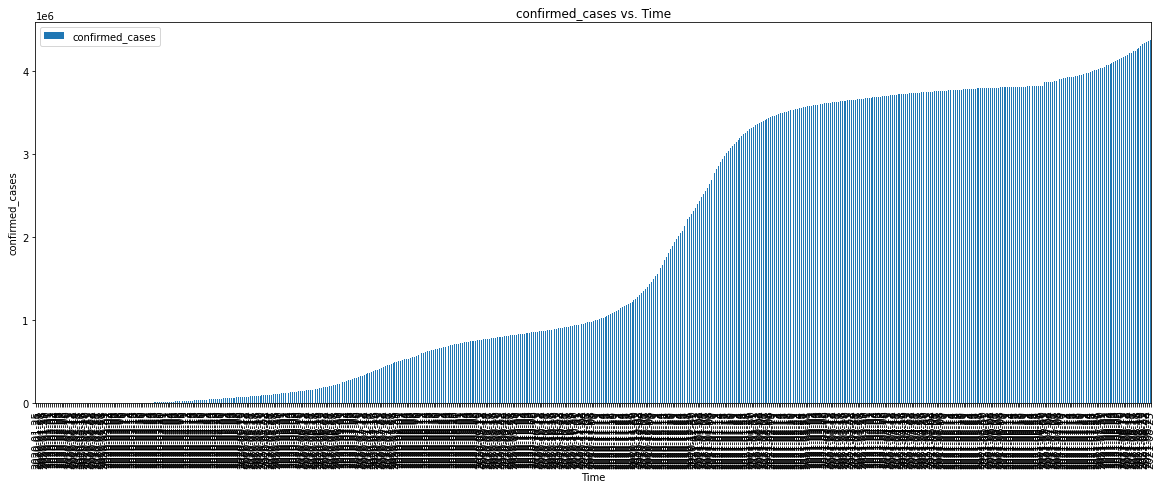

In [15]:
#https://pandas.pydata.org/pandas-docs/version/0.23.1/generated/pandas.DataFrame.plot.html
ax = df_ca.plot(kind='bar', x='date', y='confirmed_cases', figsize=(20,7))
ax.set_title('confirmed_cases vs. Time')
ax.set_xlabel('Time')
ax.set_ylabel('confirmed_cases');

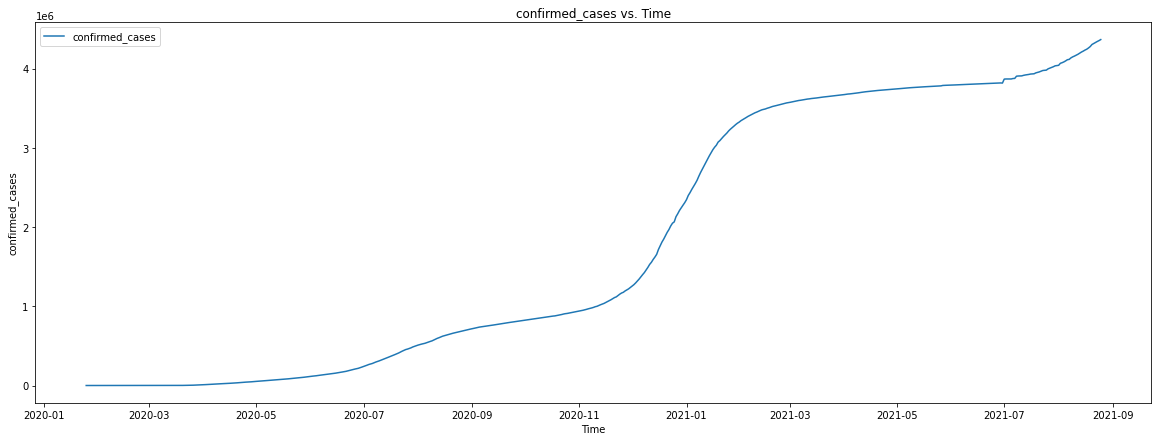

In [16]:
ax = df_ca.plot(kind='line', x='date', y='confirmed_cases', figsize=(20,7))
ax.set_title('confirmed_cases vs. Time')
ax.set_xlabel('Time')
ax.set_ylabel('confirmed_cases');

In [17]:
ax.figure.savefig("nytcovid_confirmed_cases.pdf")

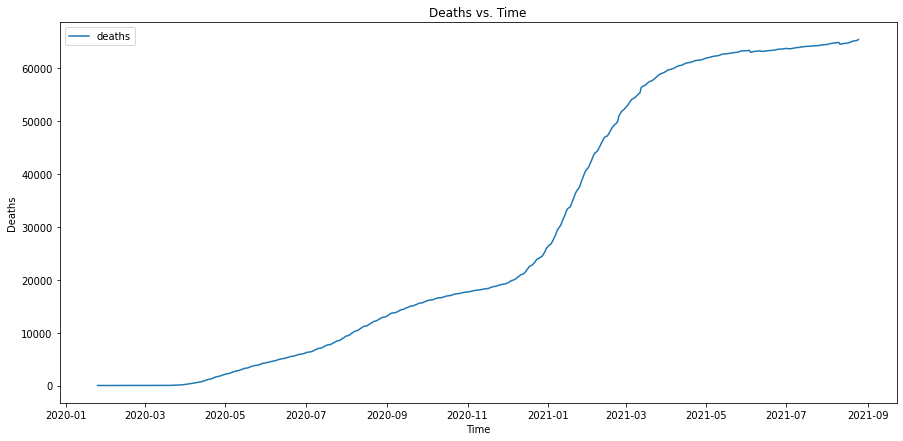

In [18]:
ax = df_ca.plot(kind='line', x='date', y='deaths', figsize=(15,7))
ax.set_title('Deaths vs. Time')
ax.set_xlabel('Time')
ax.set_ylabel('Deaths');
ax.figure.savefig("nytcovid_Deaths.pdf")

## Save Files and Connect to Google Drive
ref: https://colab.research.google.com/notebooks/io.ipynb#scrollTo=RWSJpsyKqHjH

In [ ]:
#Click download in Files section, or use the following command
from google.colab import files
files.download('nytcovid_Deaths.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pwd

/content


In [ ]:
#Save to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp ./nytcovid_confirmed_cases.pdf ./drive/My\ Drive/Colab\ Notebooks/CMPE181Sp2021

## Prediction

In [19]:
! pip install fbprophet
#https://facebook.github.io/prophet/

In [20]:
from fbprophet import Prophet
import pandas as pd

In [21]:
# Set variables 
country = 'United States'
filter_case = 'confirmed_cases' #
period_to_forecast = 45

# Filter data
#df = df[df['location']==country]
df_ca.rename(columns={"date": "ds", filter_case: "y"},inplace=True) 


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
df_ca['ds'] = pd.to_datetime(df_ca['ds'],infer_datetime_format=True)
df_ca = df_ca[df_ca['ds']>"2020-02-01"]
df_ca['y'] = df_ca['y'].astype(int)
df_ca = df_ca[['y','ds']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
df_ca

,y,ds
39,6,2020-02-02
44,6,2020-02-03
49,6,2020-02-04
55,6,2020-02-05
61,6,2020-02-06
...,...,...
29530,4316350,2021-08-21
29585,4328308,2021-08-22
29640,4341369,2021-08-23
29695,4352491,2021-08-24


In [24]:
# Run Prophet to get predictions
pred = Prophet(yearly_seasonality=False, daily_seasonality=False)
pred.fit(df_ca)
future = pred.make_future_dataframe(periods=60)
forecast = pred.predict(future)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [25]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
626,2021-10-20,4.408499e+06,4.097143e+06,4.736359e+06,4.106274e+06,4.729357e+06,382.725371,382.725371,382.725371,382.725371,382.725371,382.725371,0.0,0.0,0.0,4.408882e+06
627,2021-10-21,4.412775e+06,4.106490e+06,4.736352e+06,4.101172e+06,4.740854e+06,-733.363203,-733.363203,-733.363203,-733.363203,-733.363203,-733.363203,0.0,0.0,0.0,4.412041e+06
628,2021-10-22,4.417051e+06,4.083175e+06,4.754323e+06,4.094929e+06,4.752022e+06,67.140644,67.140644,67.140644,67.140644,67.140644,67.140644,0.0,0.0,0.0,4.417118e+06
629,2021-10-23,4.421326e+06,4.087992e+06,4.767433e+06,4.090816e+06,4.766218e+06,164.174368,164.174368,164.174368,164.174368,164.174368,164.174368,0.0,0.0,0.0,4.421490e+06
630,2021-10-24,4.425602e+06,4.085042e+06,4.771300e+06,4.087556e+06,4.781831e+06,-472.465388,-472.465388,-472.465388,-472.465388,-472.465388,-472.465388,0.0,0.0,0.0,4.425130e+06


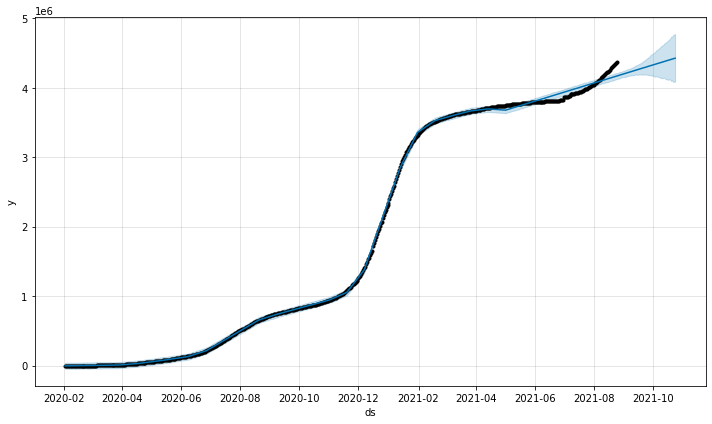

In [26]:
#Plot the prediction Graph
graph = pred.plot(forecast)

In [27]:
graph.savefig("Prophet_prediction.pdf")

In [28]:
df_ca.to_csv('df_ca.csv', index=False)

# COVID-19 JHU Coronavirus COVID-19 Global Cases, by country
ref: https://console.cloud.google.com/marketplace/details/johnshopkins/covid19_jhu_global_cases?filter=solution-type%3Adataset&filter=category%3Acovid19&id=430e16bb-bd19-42dd-bb7a-d38386a9edf5

In [29]:
from google.cloud import bigquery
project_id = 'cmpelkk'
client = bigquery.Client(project=project_id)


In [30]:
sql_covid19_jhu = """
SELECT
  *
FROM
  `bigquery-public-data.covid19_jhu_csse.summary` 
WHERE
  country_region = "US"
  AND date = '2021-01-29'
ORDER BY
  confirmed desc
"""
dfquery_covid19_jhu = client.query(sql_covid19_jhu)
df_covid19=dfquery_covid19_jhu.to_dataframe()
df_covid19.head(100)

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
0,California,US,2021-01-29,34.308284,-118.228241,POINT(-118.2282411 34.30828379),1104720,16353,0,1088367,06037,Los Angeles,"Los Angeles, California, US"
1,Arizona,US,2021-01-29,33.348359,-112.491815,POINT(-112.4918154 33.34835867),465875,7375,0,458500,04013,Maricopa,"Maricopa, Arizona, US"
2,Illinois,US,2021-01-29,41.841448,-87.816588,POINT(-87.81658794 41.84144849),451581,9374,0,442207,17031,Cook,"Cook, Illinois, US"
3,Florida,US,2021-01-29,25.611236,-80.551706,POINT(-80.55170587 25.6112362),368137,4817,0,363320,12086,Miami-Dade,"Miami-Dade, Florida, US"
4,Texas,US,2021-01-29,29.858649,-95.393395,POINT(-95.39339521 29.85864939),311665,4196,0,307469,48201,Harris,"Harris, Texas, US"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Florida,US,2021-01-29,27.950271,-81.697329,POINT(-81.69732947 27.95027105),49692,964,0,48728,12105,Polk,"Polk, Florida, US"
96,Kansas,US,2021-01-29,38.885482,-94.822509,POINT(-94.82250877 38.88548175),49641,655,0,48986,20091,Johnson,"Johnson, Kansas, US"
97,Massachusetts,US,2021-01-29,41.792284,-71.108722,POINT(-71.10872211 41.79228404),49541,1325,0,48216,25005,Bristol,"Bristol, Massachusetts, US"
98,New Jersey,US,2021-01-29,39.889545,-74.280893,POINT(-74.28089251 39.8895449),49418,1643,0,47775,34029,Ocean,"Ocean, New Jersey, US"


In [31]:
sql_covid19_jhu = """
SELECT
  *
FROM
  `bigquery-public-data.covid19_jhu_csse.summary` 
WHERE
  country_region = "US"
"""
dfquery_covid19_jhu = client.query(sql_covid19_jhu)
df_covid19=dfquery_covid19_jhu.to_dataframe()
df_covid19.head(100)

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
0,Vermont,US,2020-04-17,44.032173,-73.141309,POINT(-73.14130877 44.03217337),57,1.0,0.0,56.0,50001,Addison,"Addison, Vermont, US"
1,Maine,US,2020-04-17,44.166475,-70.203806,POINT(-70.20380627 44.1664747),32,1.0,0.0,31.0,23001,Androscoggin,"Androscoggin, Maine, US"
2,Arizona,US,2020-04-17,35.394650,-109.489238,POINT(-109.4892383 35.39465006),141,0.0,0.0,141.0,04001,Apache,"Apache, Arizona, US"
3,Massachusetts,US,2020-04-17,41.729806,-70.288543,POINT(-70.28854339 41.72980578),573,18.0,0.0,555.0,25001,Barnstable,"Barnstable, Massachusetts, US"
4,New Hampshire,US,2020-04-17,43.516373,-71.416842,POINT(-71.41684235 43.51637314),25,0.0,0.0,25.0,33001,Belknap,"Belknap, New Hampshire, US"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Vermont,US,2020-04-17,42.986982,-72.712689,POINT(-72.71268875 42.986982),60,2.0,0.0,58.0,50025,Windham,"Windham, Vermont, US"
96,Vermont,US,2020-04-17,43.580109,-72.585952,POINT(-72.58595157 43.58010937),33,2.0,0.0,31.0,50027,Windsor,"Windsor, Vermont, US"
97,Massachusetts,US,2020-04-17,42.350270,-71.904934,POINT(-71.90493363 42.35026951),2765,84.0,0.0,2681.0,25027,Worcester,"Worcester, Massachusetts, US"
98,Arizona,US,2020-04-17,34.599339,-112.553859,POINT(-112.5538588 34.59933926),69,1.0,0.0,68.0,04025,Yavapai,"Yavapai, Arizona, US"


In [32]:
df_covid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1673821 entries, 0 to 1673820
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   province_state  1673821 non-null  object 
 1   country_region  1673821 non-null  object 
 2   date            1673821 non-null  object 
 3   latitude        1639274 non-null  float64
 4   longitude       1639274 non-null  float64
 5   location_geom   1639274 non-null  object 
 6   confirmed       1673821 non-null  int64  
 7   deaths          1673791 non-null  float64
 8   recovered       1110198 non-null  float64
 9   active          1108534 non-null  float64
 10  fips            1666199 non-null  object 
 11  admin2          1669004 non-null  object 
 12  combined_key    1672261 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 166.0+ MB


In [33]:
import pandas as pd
#convert date variable to datetine object
df_covid19['date'] = pd.to_datetime(df_covid19['date'])
df_covid19.head(100)

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
0,Vermont,US,2020-04-17,44.032173,-73.141309,POINT(-73.14130877 44.03217337),57,1.0,0.0,56.0,50001,Addison,"Addison, Vermont, US"
1,Maine,US,2020-04-17,44.166475,-70.203806,POINT(-70.20380627 44.1664747),32,1.0,0.0,31.0,23001,Androscoggin,"Androscoggin, Maine, US"
2,Arizona,US,2020-04-17,35.394650,-109.489238,POINT(-109.4892383 35.39465006),141,0.0,0.0,141.0,04001,Apache,"Apache, Arizona, US"
3,Massachusetts,US,2020-04-17,41.729806,-70.288543,POINT(-70.28854339 41.72980578),573,18.0,0.0,555.0,25001,Barnstable,"Barnstable, Massachusetts, US"
4,New Hampshire,US,2020-04-17,43.516373,-71.416842,POINT(-71.41684235 43.51637314),25,0.0,0.0,25.0,33001,Belknap,"Belknap, New Hampshire, US"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Vermont,US,2020-04-17,42.986982,-72.712689,POINT(-72.71268875 42.986982),60,2.0,0.0,58.0,50025,Windham,"Windham, Vermont, US"
96,Vermont,US,2020-04-17,43.580109,-72.585952,POINT(-72.58595157 43.58010937),33,2.0,0.0,31.0,50027,Windsor,"Windsor, Vermont, US"
97,Massachusetts,US,2020-04-17,42.350270,-71.904934,POINT(-71.90493363 42.35026951),2765,84.0,0.0,2681.0,25027,Worcester,"Worcester, Massachusetts, US"
98,Arizona,US,2020-04-17,34.599339,-112.553859,POINT(-112.5538588 34.59933926),69,1.0,0.0,68.0,04025,Yavapai,"Yavapai, Arizona, US"


In [35]:
df_covid19.describe()

,latitude,longitude,confirmed,deaths,recovered,active
count,1.639274e+06,1.639274e+06,1.673821e+06,1.673791e+06,1.110198e+06,1.108534e+06
mean,3.798701e+01,-9.134711e+01,5.422306e+03,1.053008e+02,4.534065e+02,2.531550e+03
std,5.969036e+00,1.449300e+01,2.496222e+04,5.276980e+02,3.909457e+04,4.217749e+04
min,-1.427100e+01,-1.741596e+02,0.000000e+00,0.000000e+00,0.000000e+00,-6.298082e+06
25%,3.436399e+01,-9.774216e+01,1.370000e+02,2.000000e+00,0.000000e+00,4.700000e+01
50%,3.818574e+01,-8.979746e+01,8.600000e+02,1.600000e+01,0.000000e+00,3.600000e+02
75%,4.168630e+01,-8.296568e+01,3.106000e+03,5.900000e+01,0.000000e+00,1.567000e+03
max,6.931479e+01,1.456739e+02,1.391513e+06,2.515200e+04,6.399531e+06,2.461378e+06


In [36]:
df_covid19.isnull().sum()

province_state         0
country_region         0
date                   0
latitude           34547
longitude          34547
location_geom      34547
confirmed              0
deaths                30
recovered         563623
active            565287
fips                7622
admin2              4817
combined_key        1560
dtype: int64

In [37]:
import numpy as np
df_covid19['latitude'] = df_covid19['latitude'].replace(np.nan,'nan')
df_covid19['longitude'] = df_covid19['longitude'].replace(np.nan,'nan')
df_covid19['deaths'] = df_covid19['deaths'].replace(np.nan,'nan')

In [38]:
df_covid19['deaths'] = df_covid19['deaths'].replace(np.nan,0)
df_covid19['deaths'] = df_covid19['deaths'].replace('nan',0)
df_covid19['deaths'] = df_covid19['deaths'].replace('NaN',0)

In [39]:
df_covid19.isnull().sum()

province_state         0
country_region         0
date                   0
latitude               0
longitude              0
location_geom      34547
confirmed              0
deaths                 0
recovered         563623
active            565287
fips                7622
admin2              4817
combined_key        1560
dtype: int64

In [40]:
#df_covid19 = df_covid19.sort_values(by=['province_state','date'])
df_covid19 = df_covid19.sort_values(by=['date', 'province_state'])
df_covid19.tail(100)

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
1590030,West Virginia,US,2021-08-25,39.2097,-81.5163,POINT(-81.5162836 39.20967886),8781,180.0,NaN,NaN,54107,Wood,"Wood, West Virginia, US"
1590031,West Virginia,US,2021-08-25,37.6123,-81.5451,POINT(-81.54511071 37.612327),2386,41.0,NaN,NaN,54109,Wyoming,"Wyoming, West Virginia, US"
1594043,West Virginia,US,2021-08-25,nan,nan,None,0,0.0,NaN,NaN,90054,Unassigned,"Unassigned, West Virginia, US"
1307849,Wisconsin,US,2021-08-25,43.9697,-89.7678,POINT(-89.76782777 43.96974651),2133,21.0,NaN,NaN,55001,Adams,"Adams, Wisconsin, US"
1307850,Wisconsin,US,2021-08-25,46.3196,-90.6784,POINT(-90.67837132 46.31956891),1466,15.0,NaN,NaN,55003,Ashland,"Ashland, Wisconsin, US"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
648922,Wyoming,US,2021-08-25,43.9352,-110.589,POINT(-110.5890801 43.93522482),4300,11.0,NaN,NaN,56039,Teton,"Teton, Wyoming, US"
648923,Wyoming,US,2021-08-25,41.2878,-110.548,POINT(-110.5475782 41.2878183),2841,14.0,NaN,NaN,56041,Uinta,"Uinta, Wyoming, US"
648924,Wyoming,US,2021-08-25,43.9045,-107.68,POINT(-107.680187 43.90451606),1003,26.0,NaN,NaN,56043,Washakie,"Washakie, Wyoming, US"
648925,Wyoming,US,2021-08-25,43.8396,-104.567,POINT(-104.5674881 43.83961191),760,6.0,NaN,NaN,56045,Weston,"Weston, Wyoming, US"


In [41]:
first_day = min(df_covid19['date'])
last_day = max(df_covid19['date'])
print('First day {}, Last day {}, Number of days {}'.format(first_day, last_day, (last_day - first_day).days + 1))

First day 2020-01-22 00:00:00, Last day 2021-08-25 00:00:00, Number of days 582


In [42]:
ddd=df_covid19.groupby('date')[['confirmed','deaths']]
ddd.sum()

,confirmed,deaths
date,,
2020-01-22,1,0.0
2020-01-23,1,0.0
2020-01-24,2,0.0
2020-01-25,2,0.0
2020-01-26,5,0.0
...,...,...
2021-08-21,37673118,628303.0
2021-08-22,37709810,628503.0
2021-08-23,37939641,629411.0


In [43]:
info_us = pd.DataFrame(ddd.sum()).reset_index().sort_values(by='date')
info_us.tail(10)

,date,confirmed,deaths
572,2021-08-16,36888952,622321.0
573,2021-08-17,37017854,623322.0
574,2021-08-18,37155669,624258.0
575,2021-08-19,37294141,625166.0
576,2021-08-20,37613597,627843.0
577,2021-08-21,37673118,628303.0
578,2021-08-22,37709810,628503.0
579,2021-08-23,37939641,629411.0
580,2021-08-24,38074886,630816.0
581,2021-08-25,38223029,632272.0


In [44]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
from plotly.subplots import make_subplots

# Create figure with secondary y-axis, ref: https://plotly.com/python/multiple-axes/
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=info_us.date, y=info_us.confirmed, name='Confirmed Cases', line=dict(color='cyan')))
fig.add_trace(go.Scatter(x=info_us.date, y=info_us.deaths, name='Fatalities', line=dict(color='purple')), secondary_y=True)

fig.update_yaxes(title_text="Confirmed Cases", secondary_y=False)
fig.update_yaxes(title_text="Fatalities", secondary_y=True)
fig.update_layout(title_text='Confirmed Cases and Fatalities', title_x=0.5)
fig.show()
#fig.write_image("images/fig1.pdf")
#fig.write_image("images/fig1.svg")

## Confirmed cases map view

In [45]:
df_country = df_covid19[df_covid19['date'] == max(df_covid19['date'])].copy()
fig = px.scatter_geo(df_country,
                     lat='latitude', lon='longitude', color="country_region",
                     hover_name="country_region", size="confirmed",
                     projection="natural earth")
fig.update_geos(scope="north america",
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Blue"
)
fig.update_layout(title='US Confirmed Cases - {}'.format(max(df_covid19['date'])), title_x=0.5)
fig.show()

In [46]:
fig = px.scatter_geo(df_country,
                     lat='latitude', lon='longitude', color="country_region",
                     hover_name="country_region", size="deaths",
                     projection="natural earth")#,animation_frame="date")
fig.update_geos(scope="north america",
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Blue"
)
fig.update_layout(title='US Fatalities - {}'.format(max(df_covid19['date'])), title_x=0.5)
fig.show()

## Top 10 states - Confirmed Cases

In [47]:
print(last_day)
topStateConfCases = pd.DataFrame(df_covid19[df_covid19['date'] == last_day].groupby(['province_state'])['confirmed'].sum()).reset_index().sort_values(by='confirmed', ascending=False).reset_index(drop=True).loc[:10,'province_state'].values

2021-08-25 00:00:00


In [48]:
topStateConfCases

array(['California', 'Texas', 'Florida', 'New York', 'Illinois',
       'Georgia', 'Pennsylvania', 'Ohio', 'North Carolina', 'New Jersey',
       'Michigan'], dtype=object)

In [49]:
fig = go.Figure()
for state in topStateConfCases:
    info_state = pd.DataFrame(df_covid19[df_covid19['province_state'] == state].groupby('date')['confirmed'].sum()).reset_index().sort_values(by='date')
    fig.add_trace(go.Scatter(x=info_state.date, y=info_state.confirmed, name=state))
fig.update_layout(title_text='Confirmed Cases in top 10 states', title_x=0.5)
fig.show()

## Top 10 states - New Cases

In [50]:
df_confCases = pd.DataFrame(df_covid19.groupby(['date','province_state'])['confirmed'].sum()).reset_index().sort_values(by=['province_state','date'])
df_confCases.tail(30)

,date,province_state,confirmed
30393,2021-07-31,Wyoming,65127
30451,2021-08-01,Wyoming,65127
30509,2021-08-02,Wyoming,65467
30567,2021-08-03,Wyoming,65704
30625,2021-08-04,Wyoming,65953
30683,2021-08-05,Wyoming,66200
30741,2021-08-06,Wyoming,66453
30799,2021-08-07,Wyoming,66453
30857,2021-08-08,Wyoming,66453
30915,2021-08-09,Wyoming,67026


In [51]:
for state in df_confCases['province_state'].unique():
    confirmdf=df_confCases.loc[df_confCases['province_state'] == state,'confirmed'] # select state
    newconfirmdf=np.diff(confirmdf) # new cases
    df_confCases.loc[df_confCases['province_state'] == state, 'NewCases'] = np.append(0, newconfirmdf)
df_confCases.tail(30)

,date,province_state,confirmed,NewCases
30393,2021-07-31,Wyoming,65127,0.0
30451,2021-08-01,Wyoming,65127,0.0
30509,2021-08-02,Wyoming,65467,340.0
30567,2021-08-03,Wyoming,65704,237.0
30625,2021-08-04,Wyoming,65953,249.0
30683,2021-08-05,Wyoming,66200,247.0
30741,2021-08-06,Wyoming,66453,253.0
30799,2021-08-07,Wyoming,66453,0.0
30857,2021-08-08,Wyoming,66453,0.0
30915,2021-08-09,Wyoming,67026,573.0


In [52]:
#select top new cases of state in the last day
topStateNewCases = df_confCases[df_confCases['date'] == last_day].sort_values(by='NewCases', ascending=False).reset_index(drop=True).loc[:10,'province_state'].values
topStateNewCases

array(['Texas', 'California', 'Georgia', 'Iowa', 'Louisiana',
       'North Carolina', 'Michigan', 'Indiana', 'Kentucky', 'Ohio',
       'Illinois'], dtype=object)

In [53]:
fig = go.Figure()
for state in topStateNewCases:
    info_state = df_confCases[df_confCases['province_state'] == state]
    fig.add_trace(go.Scatter(x=info_state.date, y=info_state.NewCases, name=state))
fig.update_layout(title_text='New Cases in top 10 states', title_x=0.5)
fig.show()

## Top 10 states - Fatalities

In [54]:
lastday_df=df_covid19[df_covid19['date'] == last_day] #Last day data
lastday_df=lastday_df.groupby(['province_state'])
lastday_df.tail(30)

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
437905,Alabama,US,2021-08-25,34.5204,-87.3107,POINT(-87.31069453 34.52041498),3569,100.0,NaN,NaN,01079,Lawrence,"Lawrence, Alabama, US"
437906,Alabama,US,2021-08-25,32.6015,-85.3513,POINT(-85.35132246 32.60154883),19342,192.0,NaN,NaN,01081,Lee,"Lee, Alabama, US"
437907,Alabama,US,2021-08-25,34.8119,-86.9831,POINT(-86.98310072 34.81185586),11975,170.0,NaN,NaN,01083,Limestone,"Limestone, Alabama, US"
437908,Alabama,US,2021-08-25,32.1597,-86.6516,POINT(-86.65158371 32.1597283),1545,55.0,NaN,NaN,01085,Lowndes,"Lowndes, Alabama, US"
437909,Alabama,US,2021-08-25,32.3876,-85.6927,POINT(-85.69267724 32.38759944),1874,54.0,NaN,NaN,01087,Macon,"Macon, Alabama, US"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
648922,Wyoming,US,2021-08-25,43.9352,-110.589,POINT(-110.5890801 43.93522482),4300,11.0,NaN,NaN,56039,Teton,"Teton, Wyoming, US"
648923,Wyoming,US,2021-08-25,41.2878,-110.548,POINT(-110.5475782 41.2878183),2841,14.0,NaN,NaN,56041,Uinta,"Uinta, Wyoming, US"
648924,Wyoming,US,2021-08-25,43.9045,-107.68,POINT(-107.680187 43.90451606),1003,26.0,NaN,NaN,56043,Washakie,"Washakie, Wyoming, US"
648925,Wyoming,US,2021-08-25,43.8396,-104.567,POINT(-104.5674881 43.83961191),760,6.0,NaN,NaN,56045,Weston,"Weston, Wyoming, US"


In [55]:
lastday_death_df=lastday_df['deaths']
lastday_death_df.sum()

province_state
Alabama                     12000.0
Alaska                        438.0
Arizona                     18638.0
Arkansas                     6774.0
California                  65399.0
Colorado                     7088.0
Connecticut                  8335.0
Delaware                     1869.0
Diamond Princess                0.0
District of Columbia         1155.0
Florida                     42252.0
Georgia                     22400.0
Grand Princess                  3.0
Guam                          145.0
Hawaii                        573.0
Idaho                        2316.0
Illinois                    26249.0
Indiana                     14340.0
Iowa                         6268.0
Kansas                       5538.0
Kentucky                     7640.0
Louisiana                   12226.0
Maine                         926.0
Maryland                     9967.0
Massachusetts               18199.0
Michigan                    21446.0
Minnesota                    7875.0
Mississippi  

In [56]:
topstatedeath_pd=pd.DataFrame(lastday_death_df.sum())
topstatedeath_pd

,deaths
province_state,
Alabama,12000.0
Alaska,438.0
Arizona,18638.0
Arkansas,6774.0
California,65399.0
Colorado,7088.0
Connecticut,8335.0
Delaware,1869.0
Diamond Princess,0.0


In [57]:
topstatedeath_pd=topstatedeath_pd.reset_index().sort_values(by='deaths', ascending=False)
topstatedeath_pd

,province_state,deaths
4,California,65399.0
49,Texas,55798.0
35,New York,54100.0
10,Florida,42252.0
42,Pennsylvania,28131.0
33,New Jersey,26796.0
16,Illinois,26249.0
11,Georgia,22400.0
25,Michigan,21446.0
39,Ohio,20729.0


In [58]:
topstatedeath_pd=topstatedeath_pd.reset_index(drop=True) #drops the current index of the DataFrame and replaces it with an index of increasing integers.
topstatedeath_pd

,province_state,deaths
0,California,65399.0
1,Texas,55798.0
2,New York,54100.0
3,Florida,42252.0
4,Pennsylvania,28131.0
5,New Jersey,26796.0
6,Illinois,26249.0
7,Georgia,22400.0
8,Michigan,21446.0
9,Ohio,20729.0


In [59]:
topStatesdeaths = topstatedeath_pd.loc[:10,'province_state'].values #select top 10 rows of states
topStatesdeaths

array(['California', 'Texas', 'New York', 'Florida', 'Pennsylvania',
       'New Jersey', 'Illinois', 'Georgia', 'Michigan', 'Ohio', 'Arizona'],
      dtype=object)

In [60]:
fig = go.Figure()
for state in topStatesdeaths:
    info_state = pd.DataFrame(df_covid19[df_covid19['province_state'] == state].groupby('date')['deaths'].sum()).reset_index().sort_values(by='date')
    fig.add_trace(go.Scatter(x=info_state.date, y=info_state.deaths, name=state))
fig.update_layout(title_text='Fatalities in top 10 states', title_x=0.5)
fig.show()

## ARIMA Model

In [61]:
!pip install pmdarima #https://pypi.org/project/pmdarima/

     |████████████████████████████████| 1.5 MB 5.1 MB/s 
     |████████████████████████████████| 9.5 MB 50.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [62]:
from pmdarima import auto_arima

In [63]:
df_covid19_new = df_covid19.groupby(['province_state','date'])[['confirmed','deaths']].sum().reset_index()

In [64]:
df_covid19_new.tail(30)

,province_state,date,confirmed,deaths
31814,Wyoming,2021-07-31,65127,776.0
31815,Wyoming,2021-08-01,65127,776.0
31816,Wyoming,2021-08-02,65467,776.0
31817,Wyoming,2021-08-03,65704,786.0
31818,Wyoming,2021-08-04,65953,786.0
31819,Wyoming,2021-08-05,66200,786.0
31820,Wyoming,2021-08-06,66453,786.0
31821,Wyoming,2021-08-07,66453,786.0
31822,Wyoming,2021-08-08,66453,786.0
31823,Wyoming,2021-08-09,67026,786.0


In [77]:
from datetime import timedelta
last_day - timedelta(days=30), last_day
(last_day - timedelta(days=30)) - first_day

Timedelta('551 days 00:00:00')

In [78]:
Ndays_forecast_val = 30
covid19_train = df_covid19_new[df_covid19_new['date'] <= last_day - timedelta(days=Ndays_forecast_val)]
covid19_val = df_covid19_new[df_covid19_new['date'] > last_day - timedelta(days=Ndays_forecast_val)]

In [79]:
covid19_train.tail(30)

,province_state,date,confirmed,deaths
31784,Wyoming,2021-07-01,62353,747.0
31785,Wyoming,2021-07-02,62445,747.0
31786,Wyoming,2021-07-03,62445,747.0
31787,Wyoming,2021-07-04,62445,747.0
31788,Wyoming,2021-07-05,62445,747.0
31789,Wyoming,2021-07-06,62642,751.0
31790,Wyoming,2021-07-07,62737,751.0
31791,Wyoming,2021-07-08,62865,751.0
31792,Wyoming,2021-07-09,62966,751.0
31793,Wyoming,2021-07-10,62966,751.0


In [80]:
dict_order_cc = {}
dict_order_ft = {}
y_arima = covid19_val.copy()
y_arima_lower = covid19_val.copy()
y_arima_upper = covid19_val.copy()

In [81]:
stateconfirmed=covid19_train.groupby(['province_state'])
stateconfirmed.tail(30)

,province_state,date,confirmed,deaths
0,"Norfolk County, MA",2020-03-03,1,0.0
1,"Norfolk County, MA",2020-03-04,1,0.0
2,"Norfolk County, MA",2020-03-05,1,0.0
3,"Norfolk County, MA",2020-03-06,2,0.0
4,"Norfolk County, MA",2020-03-07,2,0.0
...,...,...,...,...
31809,Wyoming,2021-07-26,64451,766.0
31840,"Yolo County, CA",2020-03-06,1,0.0
31841,"Yolo County, CA",2020-03-07,1,0.0
31842,"Yolo County, CA",2020-03-08,1,0.0


In [82]:
confirmed_y=covid19_train.loc[covid19_train['province_state'] == 'California','confirmed'].values
confirmed_y

array([      2,       2,       2,       2,       2,       2,     144,
           177,     221,     282,     340,     426,     557,     698,
           751,     952,    1177,    1364,    1646,    2108,    2538,
          2998,    3899,    4657,    5095,    5852,    7138,    8210,
          9399,   10773,   12004,   12837,   15034,   16019,   17351,
         18897,   19710,   21081,   21706,   22795,   23931,   25356,
         26686,   27677,   29157,   30491,   31431,   33686,   35465,
         37344,   39561,   41355,   42368,   43558,   44966,   46164,
         48747,   50130,   52026,   53347,   54903,   55884,   58456,
         60616,   62148,   63779,   66558,   67600,   69329,   70978,
         72798,   74871,   76693,   78725,   80166,   81457,   83752,
         85997,   88031,   90252,   92539,   94020,   96400,   99387,
        101050,  103813,  106622,  109895,  111951,  114733,  117215,
        119348,  122168,  125738,  128593,  130615,  133816,  136641,
        139715,  143

In [83]:
arima_model_cc = auto_arima(confirmed_y,
                         start_p=0, start_q=0, start_d=0, max_p=10, max_q=3, max_d=3,
                         start_P=0, start_Q=0, start_D=0, max_P=10, max_Q=3, max_D=3,
                                    seasonal=False, trace=False, error_action='ignore', stepwise=True, suppress_warnings=True)
preds_cc, conf_int_cc = arima_model_cc.predict(n_periods=Ndays_forecast_val, return_conf_int=True)
print(arima_model_cc.order)

(1, 2, 2)


In [84]:
print(preds_cc)

[3925240.51927655 3933091.29198413 3941131.75184448 3949335.57449901
 3957680.08882473 3966145.76994635 3974715.80260708 3983375.70513385
 3992113.00558775 4000916.96285767 4009778.32645984 4018689.12967194
 4027642.51137553 4036632.56262285 4045654.19449669 4054703.02430835
 4063775.27758891 4072867.70368176 4081977.50304915 4091102.26466692
 4100239.91210745 4109388.65710509 4118546.9595657  4127713.49312595
 4136887.11549226 4146066.84289599 4155251.8280937  4164441.34142051
 4173634.7544728  4182831.52605539]


In [85]:
print(conf_int_cc)

[[3918412.47000419 3932068.5685489 ]
 [3922154.63524254 3944027.94872572]
 [3925931.2494137  3956332.25427525]
 [3929446.22740742 3969224.92159059]
 [3932575.56394538 3982784.61370407]
 [3935254.95375174 3997036.58614096]
 [3937449.21822267 4011982.38699149]
 [3939139.79352305 4027611.61674464]
 [3940318.39520715 4043907.61596836]
 [3940983.39254046 4060850.53317489]
 [3941137.56897388 4078419.0839458 ]
 [3940786.66565782 4096591.59368605]
 [3939938.39865702 4115346.62409404]
 [3938601.7776614  4134663.3475843 ]
 [3936786.62437181 4154521.76462156]
 [3934503.22743473 4174902.82118198]
 [3931762.09322771 4195788.46195011]
 [3928573.76536625 4217161.64199726]
 [3924948.69432142 4239006.31177687]
 [3920897.14406099 4261307.38527285]
 [3916429.12631408 4284050.69790082]
 [3911554.35558569 4307222.95862448]
 [3906282.21981939 4330811.699312  ]
 [3900621.76287438 4354805.22337752]
 [3894581.67590812 4379192.5550764 ]
 [3888170.29543994 4403963.39035203]
 [3881395.60638469 4429108.0498027 ]
 

In [86]:
state='California'
y_arima.loc[(y_arima['province_state'] == state), 'confirmed'] = preds_cc
y_arima_lower.loc[(y_arima_lower['province_state'] == state),'confirmed'] = conf_int_cc[:,0]
y_arima_upper.loc[(y_arima_upper['province_state'] == state),'confirmed'] = conf_int_cc[:,1]
        

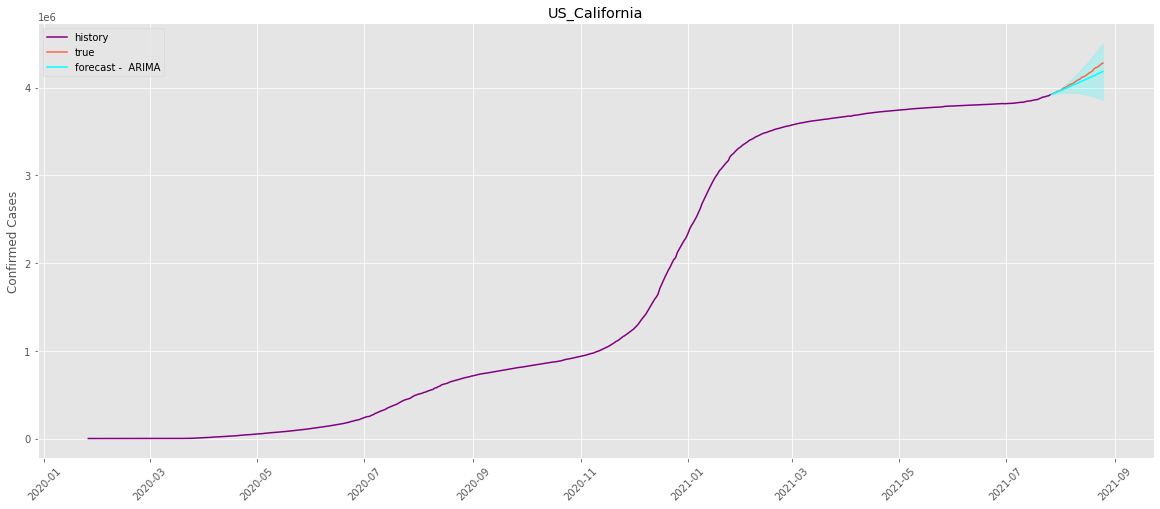

In [87]:
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set_style('dark')
#plt.style.use('dark_background')
plt.style.use('ggplot')

plt.figure(figsize=(20,8))
info_train = covid19_train[(covid19_train['province_state'] == state)]
plt.plot(info_train['date'], info_train['confirmed'], label='history', color='purple')
info_val = covid19_val[(covid19_val['province_state'] == state)]
plt.plot(info_val['date'], info_val['confirmed'], label='true', color='tomato')
info_pred = y_arima[(y_arima['province_state'] == state)]
plt.plot(info_pred['date'], info_pred['confirmed'], label='forecast -  ARIMA', color='cyan')
info_pred_lower = y_arima_lower[(y_arima_lower['province_state'] == state)]
info_pred_upper = y_arima_upper[(y_arima_upper['province_state'] == state)]
plt.fill_between(x=info_val['date'], y1=info_pred_lower['confirmed'], y2=info_pred_upper['confirmed'], color='cyan', alpha=0.2)
plt.title('{}_{}'.format('US',state))
plt.xticks(rotation=45)
plt.ylabel('Confirmed Cases')
plt.legend()
plt.show()

In [76]:
for state in covid19_train['province_state'].unique():
    print(state)

 Norfolk County, MA
Alabama
Alameda County, CA
Alaska
American Samoa
Arizona
Arkansas
Ashland, NE
Bennington County, VT
Bergen County, NJ
Berkeley, CA
Berkshire County, MA
Boston, MA
Broward County, FL
California
Carver County, MN
Charleston County, SC
Charlotte County, FL
Chatham County, NC
Cherokee County, GA
Chicago
Chicago, IL
Clark County, NV
Clark County, WA
Cobb County, GA
Collin County, TX
Colorado
Connecticut
Contra Costa County, CA
Cook County, IL
Davidson County, TN
Davis County, UT
Delaware
Delaware County, PA
Denver County, CO
Diamond Princess
District of Columbia
Douglas County, CO
Douglas County, NE
Douglas County, OR
El Paso County, CO
Fairfax County, VA
Fairfield County, CT
Fayette County, KY
Florida
Floyd County, GA
Fort Bend County, TX
Fresno County, CA
Fulton County, GA
Georgia
Grafton County, NH
Grand Princess
Grand Princess Cruise Ship
Grant County, WA
Guam
Harford County, MD
Harris County, TX
Harrison County, KY
Hawaii
Hendricks County, IN
Hillsborough, FL
Honolu

## Saving dataframe back to BigQuery

In [88]:
output_dataset_id = 'covid_demo'

output_table_id = 'covid_demo_info' 

replace_or_append_output = 'replace' #['replace', 'append']

# Combine project and dataset
project_dataset = (client.project + '.' + output_dataset_id)

# Check to make sure output dataset exists, create it if not
try:
  client.get_dataset(output_dataset_id)
  print("Dataset " + project_dataset + " exists\n")
 
except:
  print("Dataset " + project_dataset + " doesn't exist, so creating it\n")
  dataset = client.create_dataset(bigquery.Dataset(project_dataset))


Dataset cmpelkk.covid_demo exists



In [ ]:
#Print your current data
for dataset in client.list_datasets():
  print(dataset.dataset_id)

MLtest1
census
covid_demo
dataproctest
heartRateData
iottest
weatherData


In [89]:
y_arima_df = y_arima[['province_state','date','confirmed', 'deaths']]
y_arima_df.head(30)

,province_state,date,confirmed,deaths
506,Alabama,2021-07-27,574737.0,11492.0
507,Alabama,2021-07-28,577463.0,11510.0
508,Alabama,2021-07-29,577463.0,11510.0
509,Alabama,2021-07-30,577463.0,11510.0
510,Alabama,2021-07-31,585607.0,11536.0
511,Alabama,2021-08-01,587405.0,11536.0
512,Alabama,2021-08-02,589110.0,11536.0
513,Alabama,2021-08-03,592417.0,11542.0
514,Alabama,2021-08-04,595816.0,11561.0
515,Alabama,2021-08-05,599633.0,11574.0


In [ ]:
job_config = bigquery.LoadJobConfig()

# Modify job config depending on if we want to replace or append to table
if(replace_or_append_output == 'replace'):
 job_config.write_disposition = bigquery.WriteDisposition.WRITE_TRUNCATE  
else:  
 job_config.write_disposition = bigquery.WriteDisposition.WRITE_APPEND

dataset_ref = client.dataset(output_dataset_id)
table_ref = dataset_ref.table(output_table_id)

# Use client functionality to load BigQuery table from Pandas data frame
client.load_table_from_dataframe(
 dataframe = y_arima_df,
 destination = table_ref,
 job_config = job_config
 ).result()
 
print('Write to bigquery dataset (' + replace_or_append_output + ') to ' + project_dataset + '.' + output_table_id +'\n')

/usr/local/lib/python3.6/dist-packages/google/cloud/bigquery/_pandas_helpers.py:275: UserWarning:

Unable to determine type of column 'province_state'.



Write to bigquery dataset (replace) to cmpelkk.covid_demo.covid_demo_info



In [ ]:
#access our own dataset
sql = """
SELECT
    *
FROM
    `cmpelkk.covid_demo.covid_demo_info`
"""
dfmycovidquery = client.query(sql)
dfmycovid=dfmycovidquery.to_dataframe()
dfmycovid.head()

,province_state,date,confirmed,deaths,__index_level_0__
0,Alabama,2021-01-17 00:00:00+00:00,422598.0,6120.0,315
1,Alabama,2021-01-18 00:00:00+00:00,424028.0,6121.0,316
2,Alabama,2021-01-19 00:00:00+00:00,426543.0,6126.0,317
3,Alabama,2021-01-20 00:00:00+00:00,429655.0,6283.0,318
4,Alabama,2021-01-21 00:00:00+00:00,432536.0,6379.0,319


In [ ]:
dfmycovid

,province_state,date,confirmed,deaths,__index_level_0__
0,Alabama,2021-01-17 00:00:00+00:00,422598.0,6120.0,315
1,Alabama,2021-01-18 00:00:00+00:00,424028.0,6121.0,316
2,Alabama,2021-01-19 00:00:00+00:00,426543.0,6126.0,317
3,Alabama,2021-01-20 00:00:00+00:00,429655.0,6283.0,318
4,Alabama,2021-01-21 00:00:00+00:00,432536.0,6379.0,319
...,...,...,...,...,...
865,Wyoming,2021-01-27 00:00:00+00:00,51368.0,596.0,19887
866,Wyoming,2021-01-28 00:00:00+00:00,51430.0,596.0,19888
867,Wyoming,2021-01-29 00:00:00+00:00,51690.0,596.0,19889
868,Wyoming,2021-01-30 00:00:00+00:00,51704.0,596.0,19890
